<a href="https://colab.research.google.com/github/classical16/gomycode/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/5G_energy_consumption_dataset.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB
None


In [4]:
missing_values = data.isnull().sum()
print(missing_values)

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


In [5]:
data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates.head())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719


In [6]:
from scipy import stats
import numpy as np

data = data[(np.abs(stats.zscore(data['Energy'])) < 3)]
data = data[(np.abs(stats.zscore(data['load'])) < 3)]
data = data[(np.abs(stats.zscore(data['TXpower'])) < 3)]
data


,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


In [7]:
data

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
for column in ['BS']:
    data[column] = label_encoder.fit_transform(data[column])

In [10]:
print(data)

                  Time  BS     Energy      load  ESMODE   TXpower
0      20230101 010000   0  64.275037  0.487936     0.0  7.101719
1      20230101 020000   0  55.904335  0.344468     0.0  7.101719
2      20230101 030000   0  57.698057  0.193766     0.0  7.101719
3      20230101 040000   0  55.156951  0.222383     0.0  7.101719
4      20230101 050000   0  56.053812  0.175436     0.0  7.101719
...                ...  ..        ...       ...     ...       ...
92624  20230102 170000   6  14.648729  0.087538     0.0  7.325859
92625  20230102 180000   6  14.648729  0.082635     0.0  7.325859
92626  20230102 210000   6  13.452915  0.055538     0.0  7.325859
92627  20230102 220000   6  13.602392  0.058077     0.0  7.325859
92628  20230102 230000   6  13.303438  0.048173     0.0  7.325859

[89777 rows x 6 columns]


In [11]:
target_variable = 'Energy'
feature_variables = ['load', 'ESMODE', 'TXpower']

In [12]:
data

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,6,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,6,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,6,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,6,13.602392,0.058077,0.0,7.325859


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y= data[target_variable]
x= data[feature_variables].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
y_train.shape

(71821,)

In [17]:
x_train.shape

(71821, 3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 =r2_score(y_test, y_pred)

In [23]:
print('Mean Squared Error (MSE):', mse)
print('R_squared:', r2)

Mean Squared Error (MSE): 75.35551137302238
R_squared: 0.5521418172737831


In [24]:
x[:,0]

array([0.48793617, 0.34446808, 0.19376596, ..., 0.05553846, 0.05807692,
       0.04817308])

In [25]:
y_predict= model.predict(x_test)
print(y_predict.size)
print(y_test.size)

17956
17956


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

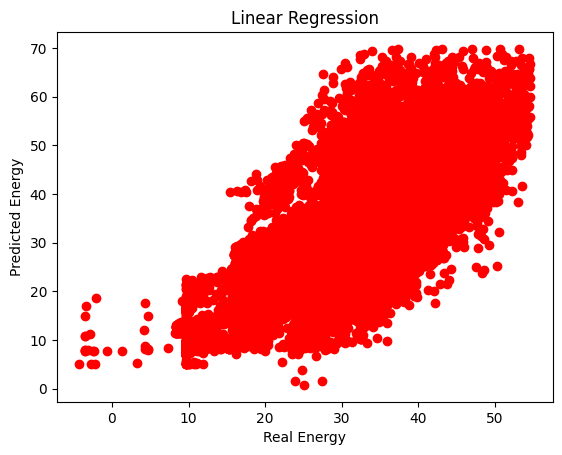

In [27]:
plt.scatter(y_predict,y_test,color ='r')
plt.title('Linear Regression')
plt.xlabel('Real Energy')
plt.ylabel('Predicted Energy')
#plt.plot(y_test,y_predict,color='k')
plt.show()


In [28]:
!pip install plotly

In [29]:
data

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,6,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,6,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,6,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,6,13.602392,0.058077,0.0,7.325859


In [30]:
import plotly.express as px

In [31]:
fig = px.histogram(data, x='Energy', y='TXpower' ,title='5G_energy_consumption_dataset')
fig.show()